In [11]:
# import libraries
import pandas as pd
import string
import collections
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
import glob
from nltk.tokenize import word_tokenize
import csv
import os
import plotly.graph_objs as go
import plotly as py
import squarify
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import pandas as pd
from adjustText import adjust_text

In [12]:
df_final_data = pd.read_csv('FinalData.csv', encoding="ISO-8859-1")

In [13]:
df_final_data.head(5)

,Job ID,Job Title,Bank Name,Fintech,Matched Cluster,Matched Words,Number of Words Matched,URL
0,1,sr-tech-manager-information-security-vulnerabi...,Bank Of America,Yes,cybersecurity,cyber security,1,http://careers.bankofamerica.com/job-detail/18...
1,2,sr-tech-manager-information-security-vulnerabi...,Bank Of America,Yes,cybersecurity,cyber security,1,http://careers.bankofamerica.com/job-detail/18...
2,3,agile-product-owner-jersey-city,Bank Of America,Yes,cybersecurity,"cybersecurity,cyber security",2,http://careers.bankofamerica.com/job-detail/18...
3,4,sr-agile-product-owner-jersey-city,Bank Of America,Yes,cybersecurity,cyber security,1,http://careers.bankofamerica.com/job-detail/18...
4,5,relationship-banker-greenville-ave-spanish-and...,Bank Of America,No,NaN,NaN,0,http://careers.bankofamerica.com/job-detail/18...


In [14]:
df=pd.DataFrame()
bank_1 = "Bank Of America"
count_no = 0
count_yes = 0
for index, row in df_final_data.iterrows():
    bank_name = df_final_data.at[index,"Bank Name"]
    fintech = df_final_data.at[index,"Fintech"]
    if  bank_1 == bank_name:
        if fintech == "Yes":
            count_yes += 1
        else:
            count_no += 1
    else:
        df=df.append({'Bank_Name':bank_1,'Count_yes':count_yes,'Count_no':count_no}, ignore_index=True)
        bank_1 = bank_name
        count_yes = 0
        count_no = 0
        if fintech == "Yes":
            count_yes += 1
        else:
            count_no += 1
df=df.append({'Bank_Name':bank_1,'Count_yes':count_yes,'Count_no':count_no}, ignore_index=True)

In [15]:
df

,Bank_Name,Count_no,Count_yes
0,Bank Of America,7342.0,344.0
1,JP Morgan,4817.0,2413.0
2,WellsFargo,1483.0,179.0
3,CitiGroup,765.0,195.0
4,Morgan Stanley,857.0,53.0
5,Goldman Sachs,118.0,516.0
6,American Express,441.0,232.0
7,US Bank,1319.0,244.0
8,Charles Schwab,535.0,277.0
9,PNC Bank,0.0,996.0


In [16]:
def total(x,y):
    return round(x+y)
def percent(x,y):
    return round(((x/y) * 100),2)
df['Total'] = df.apply(lambda row: total(row['Count_yes'],row['Count_no']), axis=1)
df['Percent_Yes'] = df.apply(lambda row: percent(row['Count_yes'],row['Total']), axis=1)
df['Percent_No'] = df.apply(lambda row: percent(row['Count_no'],row['Total']), axis=1)

'''
for index, row in df_final_data.iterrows():
    No = df.at[index,"Count_no"]
    Yes = df.at[index,"Count_yes"]
    Total = Yes + No
    print(Total) 
'''

'\nfor index, row in df_final_data.iterrows():\n    No = df.at[index,"Count_no"]\n    Yes = df.at[index,"Count_yes"]\n    Total = Yes + No\n    print(Total) \n'

In [17]:
df.tail(2)

,Bank_Name,Count_no,Count_yes,Total,Percent_Yes,Percent_No
22,Huntington Bancshares,256.0,44.0,300,14.67,85.33
23,Comerica Inc,234.0,27.0,261,10.34,89.66


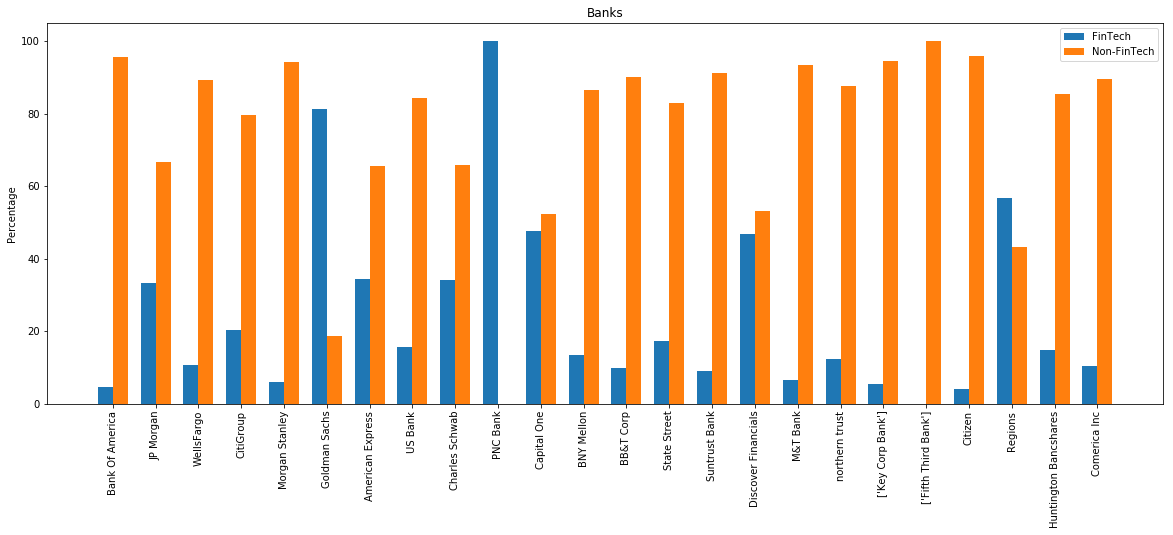

In [18]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
N = 24
Percent_Yes = df['Percent_Yes']
Percent_No = df['Percent_No']

ind = np.arange(N) 
width = 0.35 
plt.figure(figsize=(20, 7)) 
plt.bar(ind, Percent_Yes, width, label='FinTech')

plt.bar(ind + width, Percent_No, width,label='Non-FinTech')

plt.ylabel('Percentage')
plt.title('Banks')

plt.xticks(ind + width / 2 , df['Bank_Name'], rotation=90)
plt.legend(loc='best')
plt.show()

In [19]:
df_sorted = df.sort_values(by='Percent_Yes', ascending=False)
df_sorted.head(2)

,Bank_Name,Count_no,Count_yes,Total,Percent_Yes,Percent_No
9,PNC Bank,0.0,996.0,996,100.00,0.00
5,Goldman Sachs,118.0,516.0,634,81.39,18.61


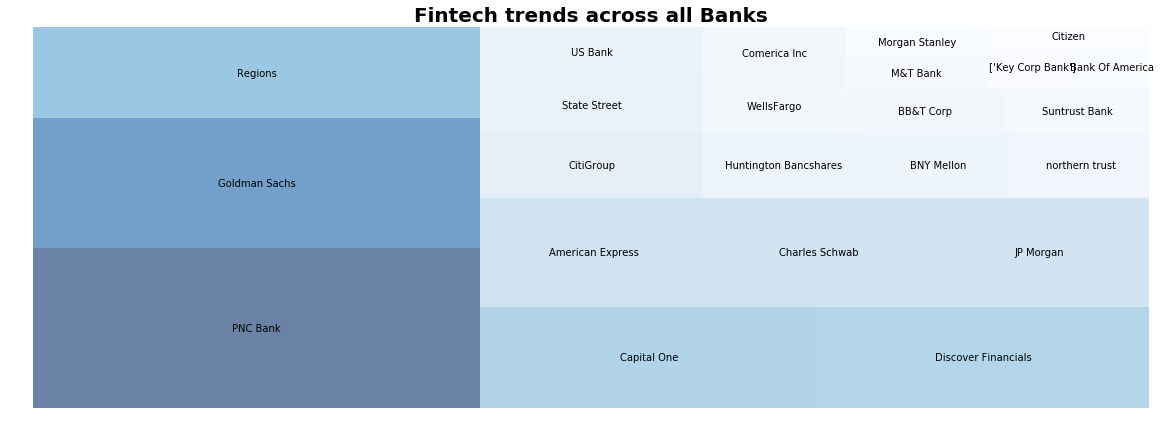

In [20]:
df_new = df_sorted[df_sorted["Percent_Yes"]>0]

#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(df_new.Percent_Yes), vmax=max(df_new.Percent_Yes))
colors = [matplotlib.cm.Blues(norm(value)) for value in df_new.Percent_Yes]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 7)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=df_new.Bank_Name, sizes=df_new.Percent_Yes, color = colors, alpha=.6)
plt.title("Fintech trends across all Banks",fontsize=20,fontweight="bold")

#Remove our axes and display the plot
plt.axis('off')
plt.show()

In [21]:
Fintech_only = df_final_data[df_final_data["Fintech"] == "Yes"]

In [22]:
Fintech_only.head(2)

,Job ID,Job Title,Bank Name,Fintech,Matched Cluster,Matched Words,Number of Words Matched,URL
0,1,sr-tech-manager-information-security-vulnerabi...,Bank Of America,Yes,cybersecurity,cyber security,1,http://careers.bankofamerica.com/job-detail/18...
1,2,sr-tech-manager-information-security-vulnerabi...,Bank Of America,Yes,cybersecurity,cyber security,1,http://careers.bankofamerica.com/job-detail/18...


In [33]:
# Making list of clusters
cluster1 = Fintech_only['Matched Cluster']
cluster_list = []
for i in list(cluster1):
    for j in i.split(","):
        cluster_list.append(j)
        
#convert list to dictionary with values and its occurences for matched clusters
word_could_dict =collections.Counter(cluster_list)

# converting to data frame of clusters and corresponding counts
dict1 = {'clusters': list(word_could_dict.keys()), 'counts': list(word_could_dict.values())}
df_cluster = pd.DataFrame.from_dict(dict1)

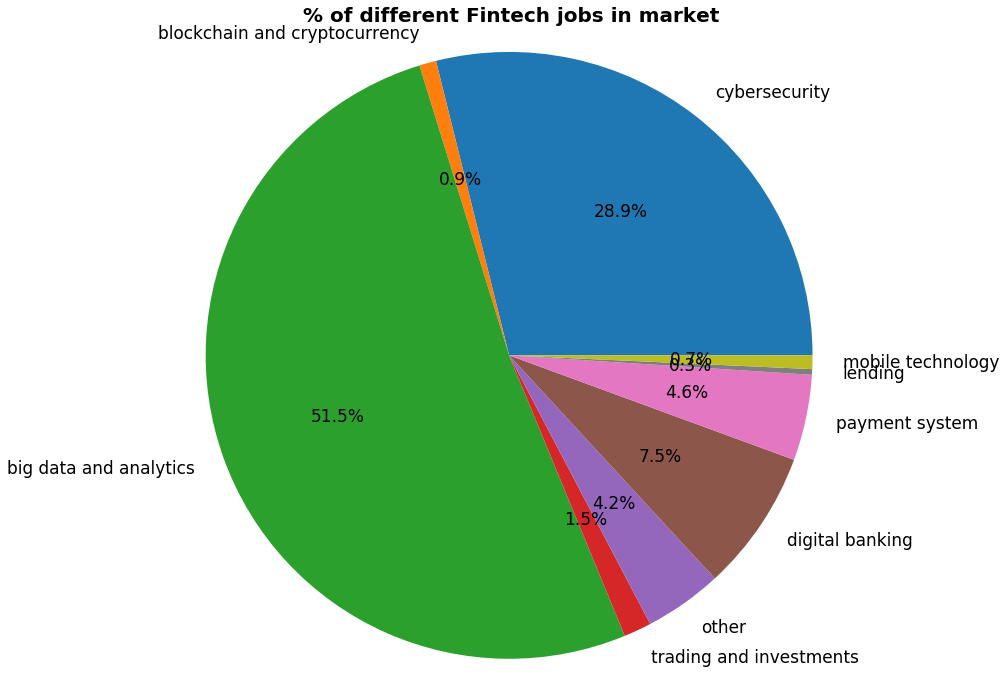

In [34]:
# Pie chart, of % of different Fintech jobs in market
labels = df_cluster['clusters']
sizes = df_cluster['counts']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',  textprops={'fontsize': 17})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle. 
plt.title(" % of different Fintech jobs in market",fontsize=20,fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(12,12)

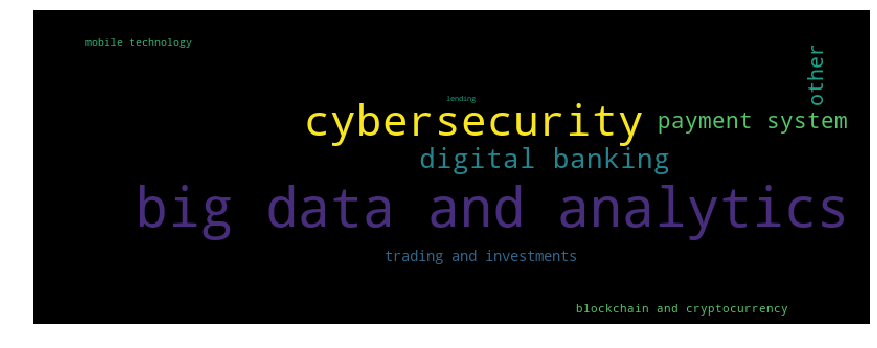

In [35]:
# Creating word cloud from word_could_dict
wordcloud = WordCloud(width = 800, height = 300).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

In [36]:
# Making list of matched key words
cluster2 = Fintech_only['Matched Words']
keywords_list = []
for i in list(cluster2):
    for j in i.split(","):
        keywords_list.append(j)
        
#convert it to dictionary with values and its occurences for matched key words
word_could_dict =collections.Counter(keywords_list)

# converting to data frame of keywords and corresponding counts
dict2 = {'keywords': list(word_could_dict.keys()), 'counts': list(word_could_dict.values())}
df_keywords = pd.DataFrame.from_dict(dict2)

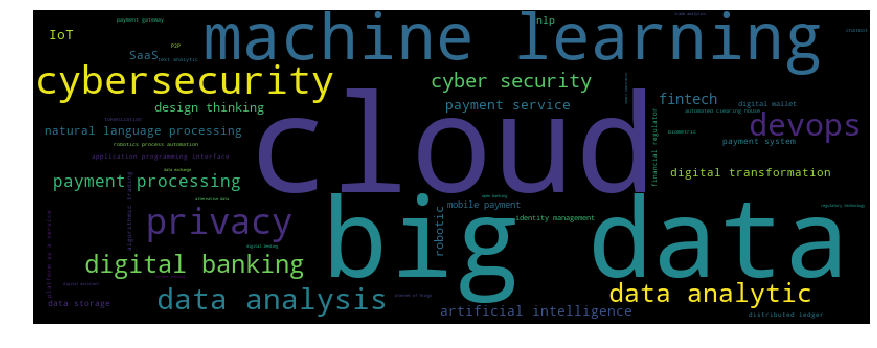

In [37]:
# Creating word cloud from word_could_dict
wordcloud = WordCloud(width = 800, height = 300).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

In [38]:
# matching clusters to keywords
clu_list = []
key_list = []
buckets = pd.read_csv('fintech_keywords.csv')
for i in list(word_could_dict.keys()):
    try:
        clu_list.append(buckets.loc[buckets.Keywords == i,'Cluster'].values[0])
        key_list.append(i)
    except:
        continue
dict_donut = {'cluster': clu_list, 'keys': key_list}
dict_donut
df_donut = pd.DataFrame.from_dict(dict_donut)
df_donut  = df_donut.sort_values(by='cluster', ascending=False)
df_donut

,cluster,keys
35,trading and investments,robotics process automation
50,trading and investments,robo-adviser
4,trading and investments,robotic
15,trading and investments,financial regulator
18,payment system,payment system
16,payment system,payment processing
33,payment system,payment service
47,payment system,payment gateway
12,other,fintech
34,other,regulatory technology


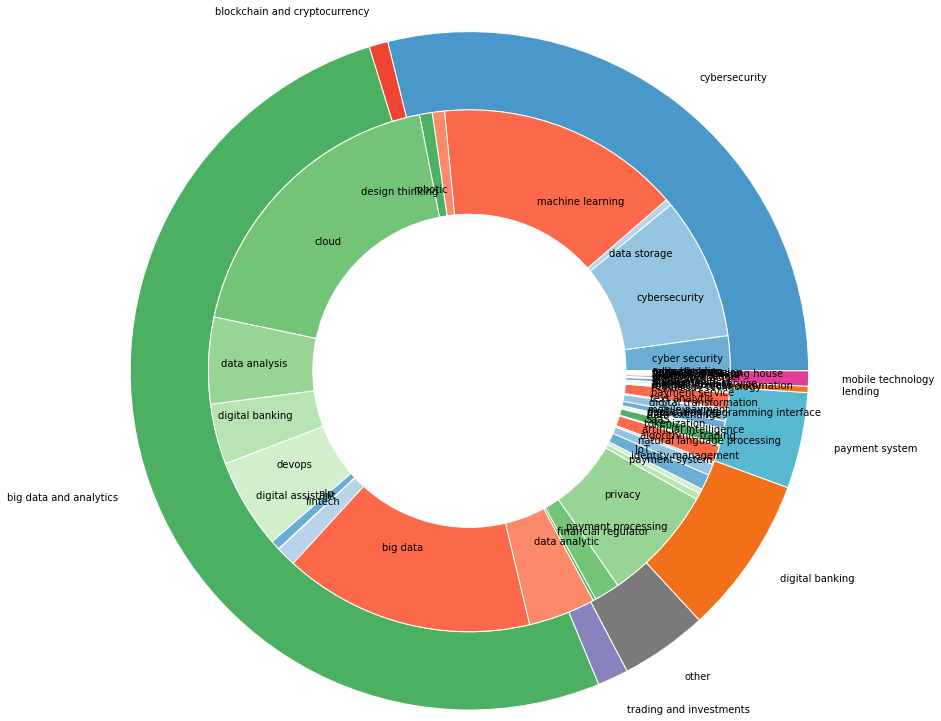

In [40]:
# Make data: selected top 3 clusters and words
group_names=df_cluster['clusters']
group_size=df_cluster['counts']
subgroup_names=df_keywords['keywords']
subgroup_size=df_keywords['counts']
 
# Create colors
a, b, c, d, e, f, g, h, i=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples, plt.cm.Greys, plt.cm.Oranges, plt.cm.GnBu, plt.cm.YlOrBr, plt.cm.RdPu]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6), d(0.6), e(0.6), f(0.6), g(0.6), h(0.6), i(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
fig = plt.gcf()
fig.set_size_inches(12,12)
# show it
plt.show()


TypeError: 'module' object is not iterable

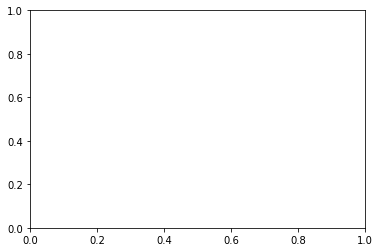

In [42]:
from adjustText import adjust_text
adjust_text(plt)
plt.show()